In [32]:
import math
import numpy
import matplotlib
import matplotlib.pyplot as plt
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [33]:
def create_data_set(_data_set, _look_back=1):
    data_x, data_y = [], []
    for i in range(len(_data_set) - _look_back - 1):
        a = _data_set[i:(i + _look_back), 0]
        data_x.append(a)
        data_y.append(_data_set[i + _look_back, 0])
    return numpy.array(data_x), numpy.array(data_y)

In [35]:
data_frame = read_csv('Train_TEC_mar17.csv')
data_frame.drop(["Date","Month","Year","Time"], axis = 1, inplace = True)
data_set = data_frame.values
data_set = data_set.astype('float32')
data_set[0:5]

array([[5.311333 , 2.0675623],
       [5.3446693, 2.0827072],
       [5.378006 , 2.004272 ],
       [5.4113426, 1.7365692],
       [5.4446793, 1.7585031]], dtype=float32)

In [36]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_set = scaler.fit_transform(data_set)

In [37]:
train_size = int(len(data_set) * 0.90)
test_size = len(data_set) - train_size
train, test = data_set[0:train_size, :], data_set[train_size:len(data_set), :]

In [38]:
look_back = 2
train_x, train_y = create_data_set(train, look_back)
test_x, test_y = create_data_set(test, look_back)

In [39]:
train_x = numpy.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = numpy.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

In [40]:
model = Sequential()
model.add(LSTM(4, activation='tanh',input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_x, train_y, epochs=25, batch_size=1, verbose=2)

Epoch 1/25
 - 12s - loss: 0.0073
Epoch 2/25
 - 12s - loss: 0.0015
Epoch 3/25
 - 13s - loss: 0.0014
Epoch 4/25
 - 13s - loss: 0.0014
Epoch 5/25
 - 13s - loss: 0.0014
Epoch 6/25
 - 13s - loss: 0.0014
Epoch 7/25
 - 13s - loss: 0.0014
Epoch 8/25
 - 13s - loss: 0.0014
Epoch 9/25
 - 13s - loss: 0.0014
Epoch 10/25
 - 13s - loss: 0.0014
Epoch 11/25
 - 13s - loss: 0.0014
Epoch 12/25
 - 13s - loss: 0.0014
Epoch 13/25
 - 13s - loss: 0.0014
Epoch 14/25
 - 13s - loss: 0.0014
Epoch 15/25
 - 13s - loss: 0.0014
Epoch 16/25
 - 13s - loss: 0.0014
Epoch 17/25
 - 13s - loss: 0.0014
Epoch 18/25
 - 13s - loss: 0.0014
Epoch 19/25
 - 13s - loss: 0.0013
Epoch 20/25
 - 13s - loss: 0.0014
Epoch 21/25
 - 13s - loss: 0.0013
Epoch 22/25
 - 13s - loss: 0.0014
Epoch 23/25
 - 14s - loss: 0.0014
Epoch 24/25
 - 13s - loss: 0.0014
Epoch 25/25
 - 13s - loss: 0.0014


In [41]:
train_predict = model.predict(train_x)
test_predict = model.predict(test_x)

In [42]:
train_predict = scaler.inverse_transform(train_predict)
train_y = scaler.inverse_transform([train_y])
test_predict = scaler.inverse_transform(test_predict)
test_y = scaler.inverse_transform([test_y])

ValueError: non-broadcastable output operand with shape (12957,1) doesn't match the broadcast shape (12957,2)

In [43]:
train_score = math.sqrt(mean_squared_error(train_y[0], train_predict[:, 0]))
print('Train Score: %.2f RMSE' % train_score)
test_score = math.sqrt(mean_squared_error(test_y[0], test_predict[:, 0]))
print('Test Score: %.2f RMSE' % test_score)

TypeError: Singleton array 0.0027962178 cannot be considered a valid collection.

In [ ]:
train_predict_plot = numpy.empty_like(data_set)
train_predict_plot[:, :] = numpy.nan
train_predict_plot[look_back:len(train_predict) + look_back, :] = train_predict

In [ ]:
test_predict_plot = numpy.empty_like(data_set)
test_predict_plot[:, :] = numpy.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1:len(data_set) - 1, :] = test_predict

In [ ]:
ds_inverted = scaler.inverse_transform(data_set)

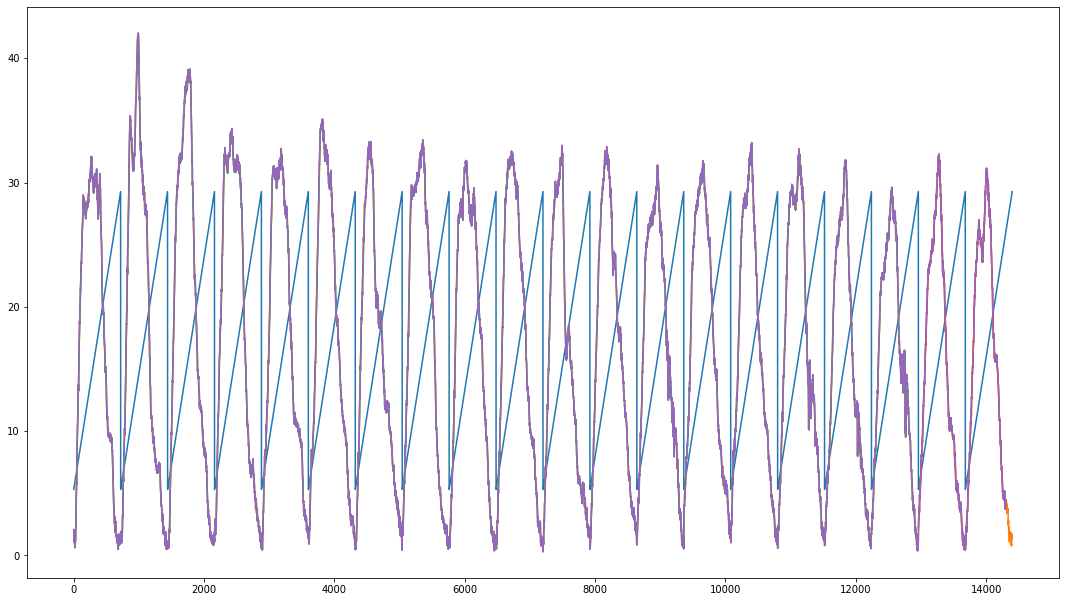

In [44]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(scaler.inverse_transform(data_set))
plt.plot(train_predict_plot[:-100])
plt.plot(test_predict_plot[:-100])
plt.plot(ds_inverted[:-100])
plt.show()